In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [170]:
data = pd.read_excel("OpenFood_Petales.xlsx")

In [171]:
data.tail()

,productname,nutriscorescore,nutriscoregrade,energy100g,saturatedfat100g,sugars100g,fiber100g,proteins100g,sodium100g
315,Extra Fin Noir Croustillant,21,e,2255,21.00,47.00,6.0,4.10,0.0520
316,Dragées cœur pétale d'amour (vert tilleul),25,e,2025,9.20,71.40,0.0,3.56,0.0268
317,Noir pétales de rose,24,e,2339,23.00,39.00,0.0,7.10,0.0080
318,Chocolat blanc coco céréales,25,e,2342,25.20,45.20,2.4,6.30,0.1520
319,Terrine chocolatée aux noisettes et pétales de...,20,e,2201,5.03,48.43,0.0,6.50,0.0800


In [175]:
H = data[data["productname"]=="Noir pétales de rose"]
type(H.iloc[0][5])

numpy.float64

(array([  7.,  22., 228.,  46.,  17.]),
 array([ 351. ,  815.8, 1280.6, 1745.4, 2210.2, 2675. ]),
 <a list of 5 Patch objects>)

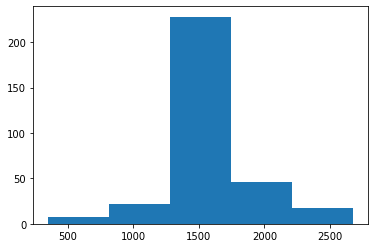

In [ ]:
plt.hist(data['energy100g'], bins = 5)

In [ ]:
#new_data= data[['nutriscoregrade', 'energy100g', 'saturatedfat100g', 'sugars100g','fiber100g','proteins100g','sodium100g']]

In [174]:
new_data= data[["productname",'energy100g', 'saturatedfat100g', 'sugars100g','fiber100g','proteins100g','sodium100g']]

In [13]:
new_data.head()

,productname,energy100g,saturatedfat100g,sugars100g,fiber100g,proteins100g,sodium100g
0,Crosti Petales Choc',1623,2.4,18.0,9.0,11.0,0.080
1,Pétales de sarrasin,1548,0.8,1.0,6.2,13.9,0.400
2,Pétales épeautre riz fruits rouges,1506,0.2,8.8,8.8,8.4,0.336
3,Special Flakes-ORIGINAL,1561,0.3,11.8,6.2,8.9,0.196
4,Pétale de maïs nature,1565,0.2,5.0,4.0,8.0,0.000


In [ ]:
new_data.isnull().sum()

energy100g          0
saturatedfat100g    0
sugars100g          0
fiber100g           0
proteins100g        0
sodium100g          0
dtype: int64

**Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data.values)

In [ ]:
scaled_data[0][0]

-0.06560054971075599

In [ ]:
scaled_data[0]

array([-0.06560055, -0.16128675, -0.08825518,  1.23155972,  0.24049367,
       -0.7868077 ])

In [ ]:
norm_data= data[['energy100g', 'saturatedfat100g', 'sugars100g','fiber100g','proteins100g','sodium100g']]

In [ ]:
for i in range(len(norm_data)) :
  for j in range(len(new_data.columns)):
    norm_data.iloc[i,j] = scaled_data[i][j]
  

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [ ]:
norm_data

,energy100g,saturatedfat100g,sugars100g,fiber100g,proteins100g,sodium100g
0,-0.065601,-0.161287,-0.088255,1.231560,0.240494,-0.786808
1,-0.303391,-0.401465,-1.248469,0.517746,0.622885,0.041285
2,-0.436554,-0.491532,-0.716136,1.180573,-0.102340,-0.124334
3,-0.262174,-0.476521,-0.511392,0.517746,-0.036410,-0.486624
4,-0.249492,-0.491532,-0.975478,-0.043108,-0.155084,-0.993831
...,...,...,...,...,...,...
315,1.938184,2.630786,1.890934,0.466759,-0.669334,-0.859266
316,1.208958,0.859471,3.556182,-1.062842,-0.740538,-0.924478
317,2.204509,2.931009,1.344950,-1.062842,-0.273757,-0.973129
318,2.214021,3.261254,1.768087,-0.451001,-0.379244,-0.600487


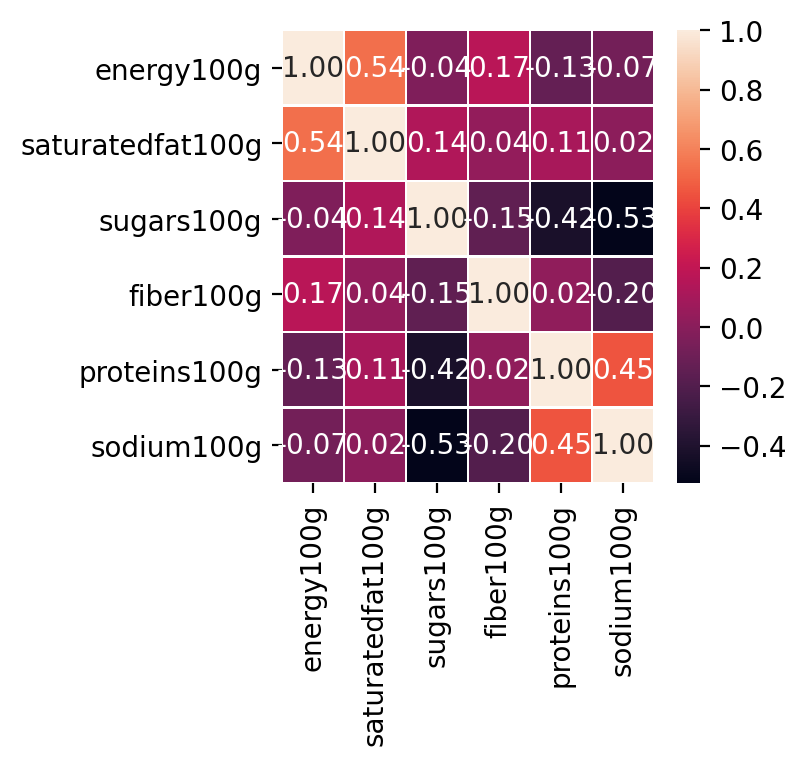

In [ ]:
f = plt.subplots(figsize=(3, 3), dpi=200)
hm = sns.heatmap(norm_data[['energy100g', 'saturatedfat100g', 'sugars100g','fiber100g','proteins100g','sodium100g']].corr(), annot=True, linewidths=0.5, fmt='.2f')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
attributes = [col for col in new_data.columns if col != 'nutriscoregrade']
X = norm_data[attributes].values
y = data['nutriscoregrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100, 
                                                    stratify=y)

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100)
random_search.fit(X, y)
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.725 (std: 0.036)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 19}

Model with rank: 2
Mean validation score: 0.706 (std: 0.058)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 19}

Model with rank: 3
Mean validation score: 0.703 (std: 0.069)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 15}



In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=19, min_samples_split=5, min_samples_leaf=1)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Test Accuracy 0.578125
Test F1-score [0.36363636 0.35294118 0.59574468 0.69767442 0.6       ]
              precision    recall  f1-score   support

           a       0.40      0.33      0.36         6
           b       0.30      0.43      0.35         7
           c       0.64      0.56      0.60        25
           d       0.68      0.71      0.70        21
           e       0.60      0.60      0.60         5

    accuracy                           0.58        64
   macro avg       0.52      0.53      0.52        64
weighted avg       0.59      0.58      0.58        64



array([[ 2,  2,  2,  0,  0],
       [ 1,  3,  3,  0,  0],
       [ 2,  4, 14,  5,  0],
       [ 0,  1,  3, 15,  2],
       [ 0,  0,  0,  2,  3]])

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=new_data.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


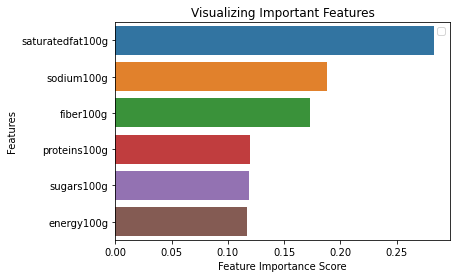

In [ ]:
select_feat = feature_imp[feature_imp>=0.03]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=select_feat, y=select_feat.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
lista = []
for col, imp in zip(attributes, clf.feature_importances_):
    lista.append((imp,col))
    lista.sort(reverse=True)
lista

[(0.2833572448700094, 'saturatedfat100g'),
 (0.1881535788299714, 'sodium100g'),
 (0.17329994848386795, 'fiber100g'),
 (0.11980409654734796, 'proteins100g'),
 (0.11846050848187722, 'sugars100g'),
 (0.11692462278692616, 'energy100g')]

In [ ]:
import pydotplus
from sklearn import tree
from IPython.display import Image

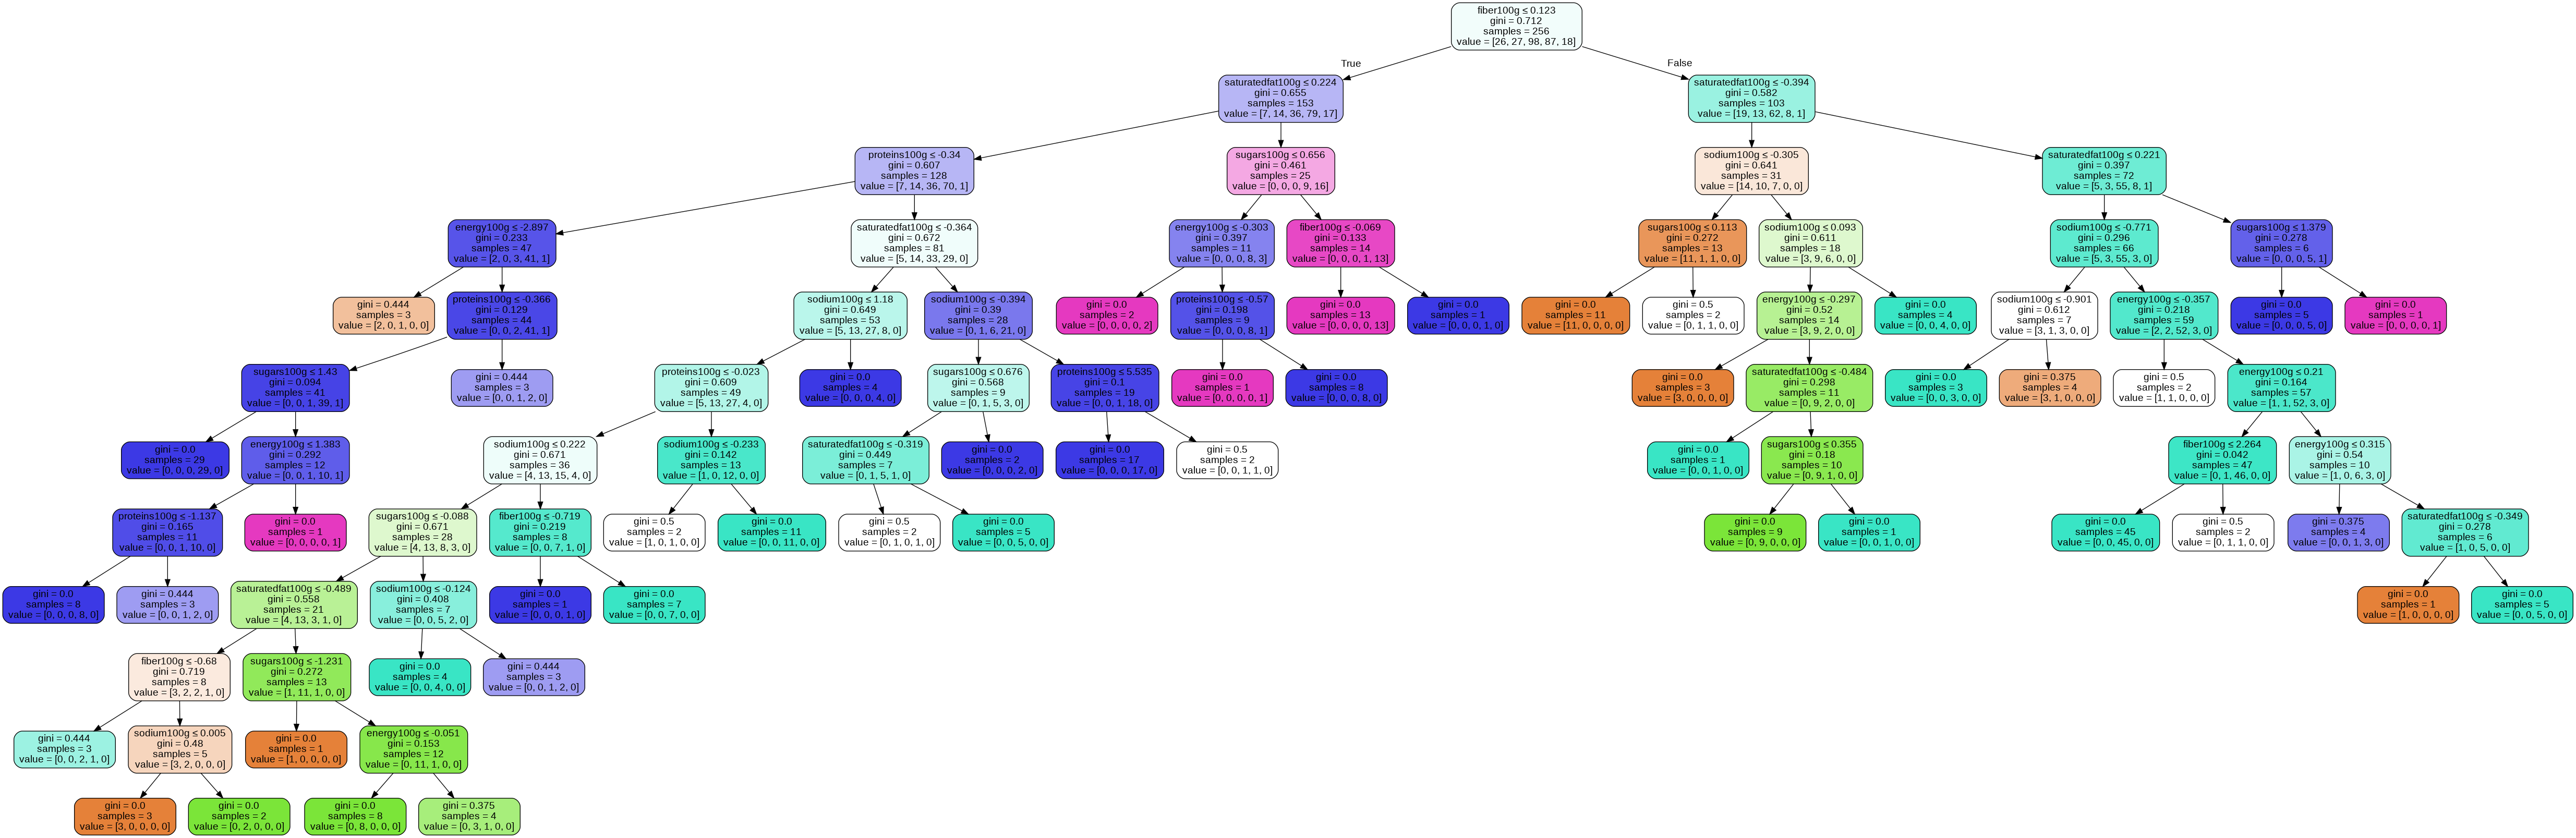

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                
                                filled=True, rounded=True,  
                                special_characters=True)
                                #,max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

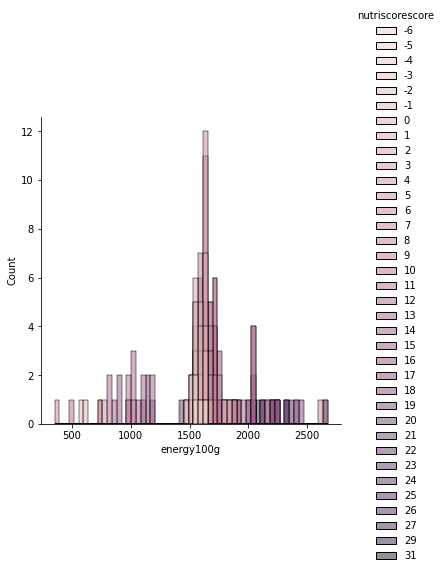

In [ ]:
sns.displot(data, x="energy100g", hue="nutriscorescore")

### Histogram

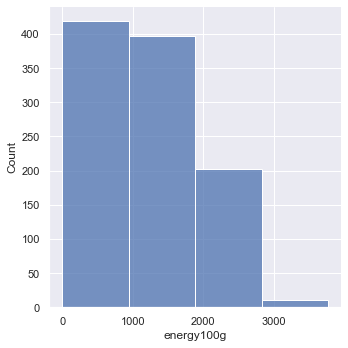

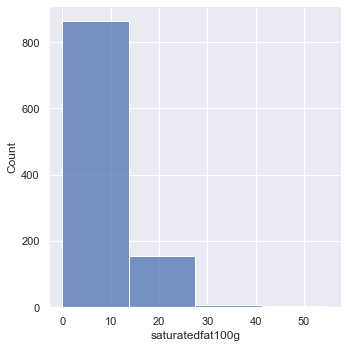

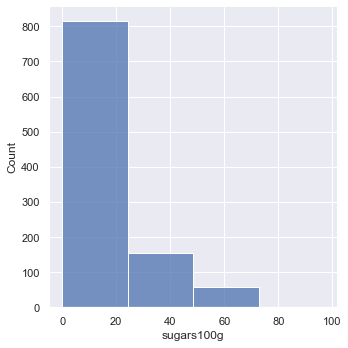

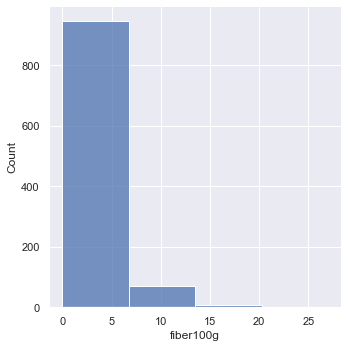

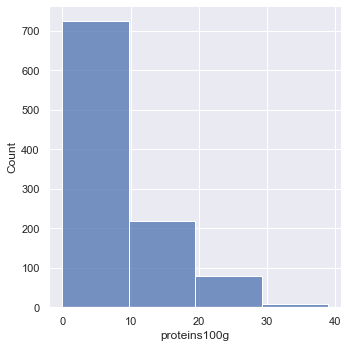

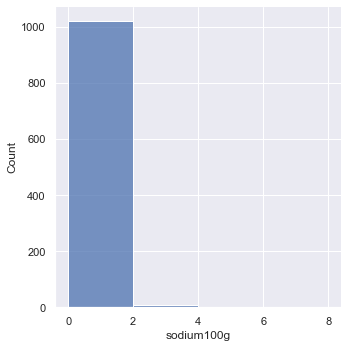

In [58]:
for i in new_data.columns: 
    if i != "productname":
        sns.set_theme(style="darkgrid")
        sns.displot(new_data, x=i, bins=4)

**Profils & poids**

In [201]:
poids = pd.read_csv("poids.csv")
profil = pd.read_csv("profil.csv")

In [202]:
poids

,energie,acide gras sat.,sucre,sodium,proteine,fibre
0,1,1,1,1,2,2


In [203]:
profil

,profil,energie,acide gras sat.,sucre,sodium,proteine,fibre
0,b6,100,0,0.0,0.0,100,100.0
1,b5,1550,11,0.8,0.3,10,11.0
2,b4,1650,14,1.0,0.4,7,8.0
3,b3,1750,17,1.7,0.5,4,5.0
4,b2,1850,20,4.0,0.6,3,2.5
5,b1,10000,100,100.0,100.0,0,0.0


**ELECTRE TRI** 

In [2]:
def concordance_partiel_1(H, b, j, critere):
  H=new_data[new_data['productname']==H]
  b=profil[profil['profil']==b]
  c=0
  if critere == 'max':
    if H.iloc[0][j] >= b.iloc[0][j]:
      c=1
      return c
    else :
      return c
  if critere == 'min':
      if b.iloc[0][j] >= H.iloc[0][j]:
        c =1 
        return c
      else :
        return c
  return 

In [15]:
concordance_partiel_1('Pétales de sarrasin', 'b6', 3,'max')

1

In [16]:
concordance_partiel_1('Pétales de sarrasin', 'b6', 6,'min')

1

In [3]:
def concordance_partiel_2(b, H, j, critere):
  H=new_data[new_data['productname']==H]
  b=profil[profil['profil']==b]
  c=0
  if critere == 'min':
    if H.iloc[0][j] >= b.iloc[0][j]:
      c=1
      return c
    else :
      return c
  if critere == 'max':
      if b.iloc[0][j] >= H.iloc[0][j]:
        c =1 
        return c
      else :
        return c
  return 

In [18]:
concordance_partiel_2('b5', 'Pétales de sarrasin',5 ,"max")

0

In [19]:
concordance_partiel_2('b5', 'Pétales de sarrasin',5 ,"min")

1

**L’indice de concordance global**

In [4]:
def concondance_global_1(H_in, b_in, critere):
  H=new_data[new_data['productname']==H_in]
  b=profil[profil['profil']==b_in]
  num=0
  den=0
  for i in range(1,len(H.columns)):
    num += poids.iloc[0][i-1]*concordance_partiel_1(H_in, b_in, i, critere[i-1])
    den += poids.iloc[0][i-1]
  return num/den

In [21]:
concondance_global_1('Pétales de sarrasin', 'b5',['max','min','max','max','min','min'])

0.625

In [5]:
def concondance_global_2(b_in, H_in, critere):
  H=new_data[new_data['productname']==H_in]
  b=profil[profil['profil']==b_in]
  num=0
  den=0
  for i in range(1,len(H.columns)):
    num += poids.iloc[0][i-1]*concordance_partiel_2(b_in, H_in, i, critere[i-1])
    den += poids.iloc[0][i-1]
  return num/den

In [23]:
concondance_global_2('b2','Pétales de sarrasin', ['max','min','max','max','min','min'])

0.5

**Détermination de la relation de surclassement S**

In [67]:
def surclassament_1(H_in, b_in, lamb, critere):
    if concondance_global_1(H_in, b_in, critere) >= lamb:
      print(str(H_in)+" S "+str(b_in)) 
      return 1
    else:
      print(str(H_in)+" ne surclasse pas "+str(b_in))
      return
    return

In [25]:
surclassament_1('Pétales de sarrasin', 'b5', 0.5,['max','min','max','max','min','min'])

Pétales de sarrasin S b5


1

In [34]:
def surclassament_2(b_in, H_in, lamb, critere):
    if concondance_global_2(b_in, H_in, critere) >= lamb:
      print(str(b_in)+" S "+str(H_in)) 
      return 1
    else:
      print(str(b_in)+" ne surclasse pas "+str(H_in)) 
      return 0
    return

In [27]:
surclassament_2("b2",'Pétales de sarrasin', 0.5,['max','min','max','max','min','min'])

b2 S Pétales de sarrasin


1

In [28]:
surclassament_2("b5",'Pétales de sarrasin', 0.5,['max','min','max','max','min','min'])

b5 ne surclasse pas Pétales de sarrasin


0

In [204]:
nutri_cat=['a','b','c','d','e']

**Procédures d’affectation**

In [71]:
def pessimiste(H_in, lamb, critere):
    for i in range(len(profil)):
      b_in= profil.iloc[i][0]
      if surclassament_1(H_in, b_in, lamb, critere) == 1:
        print("cat:", nutri_cat[i-1])
        break
    return nutri_cat[i-1]

In [186]:
pessimiste('Pétales de sarrasin', 0.5, ['min','min','min','min','max','max'])

'a'

In [188]:
pessimiste('Pétales de carotte au thym', 0.5, ['min','min','min','min','max','max'])

'd'

In [90]:
def optimiste(H_in, lamb, critere):
    for i in range(len(profil)-1,-0,-1):
        b_in= profil.iloc[i][0]
        #if surclassament_2(b_in, H_in, lamb, critere) == 1 and i==len(profil)-1:
         #   return nutri_cat[len(profil)-2]
        if surclassament_2(b_in, H_in, lamb, critere) == 1:
            print("cat:", nutri_cat[i])
            break
    return nutri_cat[i]

In [246]:
optimiste('Spécialité de Rose', 0.5, ['min','min','min','min','max','max'])

b1 S Spécialité de Rose


'e'

In [247]:
optimiste('Pétales de sarrasin', 0.5, ['min','min','min','min','max','max'])

b1 ne surclasse pas Pétales de sarrasin
b1 ne surclasse pas Pétales de sarrasin
b2 ne surclasse pas Pétales de sarrasin
b2 ne surclasse pas Pétales de sarrasin
b3 ne surclasse pas Pétales de sarrasin
b3 ne surclasse pas Pétales de sarrasin
b4 S Pétales de sarrasin
b4 S Pétales de sarrasin


'c'

### ELECTRI BD Petals

In [16]:
bd1=new_data.copy()
bd1["pessimiste_05"]=1

In [19]:
for i in range(len(bd1)):
    bd1["pessimiste_05"][i] = pessimiste(new_data.iloc[i]["productname"], 0.5, ['min','min','min','min','max','max'])

/Users/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ivan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
bd1["pessimiste_06"]=1

In [21]:
for i in range(len(bd1)):
    bd1["pessimiste_06"][i] = pessimiste(new_data.iloc[i]["productname"], 0.6, ['min','min','min','min','max','max'])

/Users/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
bd1["pessimiste_07"]=1

In [23]:
for i in range(len(bd1)):
    bd1["pessimiste_07"][i] = pessimiste(new_data.iloc[i]["productname"], 0.7, ['min','min','min','min','max','max'])

/Users/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
bd1.tail()

,productname,energy100g,saturatedfat100g,sugars100g,fiber100g,proteins100g,sodium100g,pessimiste_05,pessimiste_06,pessimiste_07,optimiste_05,optimiste_06,optimiste_07
315,Extra Fin Noir Croustillant,2255,21.00,47.00,6.0,4.10,0.0520,e,e,e,e,e,e
316,Dragées cœur pétale d'amour (vert tilleul),2025,9.20,71.40,0.0,3.56,0.0268,d,e,e,e,d,d
317,Noir pétales de rose,2339,23.00,39.00,0.0,7.10,0.0080,e,e,e,e,e,b
318,Chocolat blanc coco céréales,2342,25.20,45.20,2.4,6.30,0.1520,e,e,e,e,e,e
319,Terrine chocolatée aux noisettes et pétales de...,2201,5.03,48.43,0.0,6.50,0.0800,c,e,e,e,c,c


In [102]:
bd1["optimiste_05"]=1

In [103]:
for i in range(0,212):
    #print(i)
    bd1["optimiste_05"][i] = optimiste(new_data.iloc[i]["productname"], 0.5, ['min','min','min','min','max','max'])

/Users/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
for i in range(214,len(bd1)):
    #print(i)
    bd1["optimiste_05"][i] = optimiste(new_data.iloc[i]["productname"], 0.5, ['min','min','min','min','max','max'])

214


/Users/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319


In [117]:
bd1.iloc[212]["optimiste_05"]

'e'

In [132]:
bd1.iloc[212]["productname"]

'Spécialité de Rose'

In [116]:
bd1["optimiste_05"][213] = optimiste('Petales de rose', 0.5, ['min','min','min','min','max','max'])

/Users/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(len(bd1)):
    bd1["new_optimiste_05"][i] = optimiste(new_data.iloc[i]["productname"], 0.5, ['min','min','min','min','max','max'])

In [65]:
bd1["optimiste_06"]=1

In [66]:
for i in range(len(bd1)):
    bd1["optimiste_06"][i] = optimiste(new_data.iloc[i]["productname"], 0.6, ['min','min','min','min','max','max'])

/Users/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
bd1["optimiste_07"]=1

In [68]:
for i in range(len(bd1)):
    bd1["optimiste_07"][i] = optimiste(new_data.iloc[i]["productname"], 0.7, ['min','min','min','min','max','max'])

/Users/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
bd1

,productname,energy100g,saturatedfat100g,sugars100g,fiber100g,proteins100g,sodium100g,pessimiste_05,pessimiste_06,pessimiste_07,optimiste_05,optimiste_06,optimiste_07
0,Crosti Petales Choc',1623,2.40,18.00,9.0,11.00,0.0800,b,e,e,e,b,a
1,Pétales de sarrasin,1548,0.80,1.00,6.2,13.90,0.4000,a,b,e,c,a,a
2,Pétales épeautre riz fruits rouges,1506,0.20,8.80,8.8,8.40,0.3360,b,e,e,e,b,b
3,Special Flakes-ORIGINAL,1561,0.30,11.80,6.2,8.90,0.1960,b,e,e,e,b,b
4,Pétale de maïs nature,1565,0.20,5.00,4.0,8.00,0.0000,b,e,e,e,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Extra Fin Noir Croustillant,2255,21.00,47.00,6.0,4.10,0.0520,e,e,e,e,e,e
316,Dragées cœur pétale d'amour (vert tilleul),2025,9.20,71.40,0.0,3.56,0.0268,d,e,e,e,d,d
317,Noir pétales de rose,2339,23.00,39.00,0.0,7.10,0.0080,e,e,e,e,e,b
318,Chocolat blanc coco céréales,2342,25.20,45.20,2.4,6.30,0.1520,e,e,e,e,e,e


In [123]:
bd_prov=bd1.copy()

In [127]:
bd_prov["nutriscoregrade"]=data["nutriscoregrade"]

In [128]:
bd_prov

,productname,energy100g,saturatedfat100g,sugars100g,fiber100g,proteins100g,sodium100g,pessimiste_05,pessimiste_06,pessimiste_07,optimiste_05,optimiste_06,optimiste_07,nutriscoregrade
0,Crosti Petales Choc',1623,2.40,18.00,9.0,11.00,0.0800,b,e,e,e,b,a,a
1,Pétales de sarrasin,1548,0.80,1.00,6.2,13.90,0.4000,a,b,e,c,a,a,a
2,Pétales épeautre riz fruits rouges,1506,0.20,8.80,8.8,8.40,0.3360,b,e,e,e,b,b,a
3,Special Flakes-ORIGINAL,1561,0.30,11.80,6.2,8.90,0.1960,b,e,e,e,b,b,a
4,Pétale de maïs nature,1565,0.20,5.00,4.0,8.00,0.0000,b,e,e,e,b,b,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Extra Fin Noir Croustillant,2255,21.00,47.00,6.0,4.10,0.0520,e,e,e,e,e,e,e
316,Dragées cœur pétale d'amour (vert tilleul),2025,9.20,71.40,0.0,3.56,0.0268,d,e,e,e,d,d,e
317,Noir pétales de rose,2339,23.00,39.00,0.0,7.10,0.0080,e,e,e,e,e,b,e
318,Chocolat blanc coco céréales,2342,25.20,45.20,2.4,6.30,0.1520,e,e,e,e,e,e,e


In [131]:
from openpyxl.workbook import Workbook
bd_prov.to_excel("bd1.xlsx",
             sheet_name='lambda') 